# Hacker News

## Project Description

Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (or "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

Our questions:
* Do Ask HN or Show HN receive more comments on average?
* Do posts created at a certain time receive more comments on average?

We will use a [Hacker News data set](https://www.kaggle.com/hacker-news/hacker-news-posts) from 2016 to examine these questions with the aim of finding the best kind of question and time to post to receive the largest amount of feedback.


## Import Data Set

First, we'll import the data, creating separate objects to hold the header and the data proper.

In [1]:
from csv import reader
opened_file = open("../Datasets/HN_posts_year_to_Sep_26_2016.csv", encoding = 'utf-8')
read_file = reader(opened_file)
hn = list(read_file)
header = hn[0]
hn = hn[1:]


### Data set description: 
* `id`: the unique identifier from Hacker News for the post
* `title`: the title of the post
* `url`: the URL that the posts links to, if the post has a URL
* `num_points`: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
* `num_comments`: the number of comments on the post
* `author`: the username of the person who submitted the post
* `created_at`: the date and time of the post's submission


## Defining Key Functions

We'll want to explore the data often as we clean it and before we analyze it, so let's define a function to do that. It will help us visualize it and to see how many rows and columns we have.

In [2]:
def explore_data(dataset, start=0, end=1, nrow_ncol=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if nrow_ncol:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

## Inspecting the Data

Let's now look at the data set that we start out with. How large is it and what do the data look like?

In [3]:
print('Header')
print(header)
print('\n' + 'Data Sample')
explore_data(hn, 0, 5, nrow_ncol=True)

Header
['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

Data Sample
['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26']


['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24']


['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19']


['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']


['12578979', 'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake', 'https://www.talend.com/blog/2016/05/12/talend-and-Â\x93the-data-vaultÂ\x94', '1', '0', 'markgainor1', '9/26/2016 3

## Cleaning the Data

### Removing Data Without Comments 

Because we care about maximizing the number of comments we'll receive, we only want to consider the situation where we actually receive comments. Therefore, we will remove rows from the data if post received no comments and then re-assess the size of the data set.

In [4]:
hn_clean_1 = []
hn_no_comments = []

for row in hn:
    n_comm = int(row[4])
    if n_comm != 0:
        hn_clean_1.append(row)
    else:
        hn_no_comments.append(row)
        
explore_data(hn_clean_1, 0, 5, nrow_ncol = True)

['12578975', 'Saving the Hassle of Shopping', 'https://blog.menswr.com/2016/09/07/whats-new-with-your-style-feed/', '1', '1', 'bdoux', '9/26/2016 3:13']


['12578908', 'Ask HN: What TLD do you use for local development?', '', '4', '7', 'Sevrene', '9/26/2016 2:53']


['12578822', 'Amazons Algorithms Dont Find You the Best Deals', 'https://www.technologyreview.com/s/602442/amazons-algorithms-dont-find-you-the-best-deals/', '1', '1', 'yarapavan', '9/26/2016 2:26']


['12578694', 'Emergency dose of epinephrine that does not cost an arm and a leg', 'http://m.imgur.com/gallery/th6Ua', '2', '1', 'dredmorbius', '9/26/2016 1:54']


['12578624', 'Phone Makers Could Cut Off Drivers. So Why Dont They?', 'http://www.nytimes.com/2016/09/25/technology/phone-makers-could-cut-off-drivers-so-why-dont-they.html', '4', '1', 'danso', '9/26/2016 1:37']


Number of rows: 80401
Number of columns: 7


Roughly 213,000 posts had no comments and were removed. That's quite a few! We might ask later whether our expectations on the number of comments we receive should be tempered by the number of posts that receive no comments at the same time with the same question format.

### Taking a Random Sample

The guided Dataquest project that prompted this project slimmed down the size of the data set with comments to 20,000 entries. Presumably, this was done to minimize the computational power and time required. Such slimming is not necessary here, but we will do so regardless for practice in taking random samples. This data set will not be used in further analyses.

In [5]:
import random

sample_size = 20000
random.seed(4)
hn_clean_2 = random.sample(hn_clean_1, sample_size)

explore_data(hn_clean_2, 0, 5, nrow_ncol = True)

['11563714', 'Chart.js 2.0 Released', 'http://www.chartjs.org/', '332', '75', 'etimberg', '4/25/2016 12:16']


['11296998', 'Saving Hundreds of Hours with Google Compute Engine Per-Minute Billing', 'http://omerio.com/2016/03/16/saving-hundreds-of-hours-with-google-compute-engine-per-minute-billing/', '138', '75', 'izzym', '3/16/2016 13:17']


['12124983', 'How do we balance free speech and privacy against the safety of visible women?', 'http://www.bbc.co.uk/news/world-asia-36824514', '3', '1', 'CarolineW', '7/19/2016 21:17']


['10930104', 'Ask HN: How to govern identity in online forums?', '', '2', '7', 'austinjp', '1/19/2016 11:55']


['10636868', "Merge branch 'tcp-lockless-listener'", 'http://git.kernel.org/cgit/linux/kernel/git/torvalds/linux.git/commit/?id=c3fc7ac9a0b978ee8538058743d21feef25f7b33', '40', '6', 'signa11', '11/27/2015 11:43']


Number of rows: 20000
Number of columns: 7


### Subset "Ask HN", "Show HN", and Other Rows

Users submit "Ask HN" posts to ask the Hacker News community a specific question or show the Hacker News community a project, product, or something interesting. We want to compare the number of comments received by "Ask HN" and "Show HN" posts, so we'll separate these into different lists to inspect them. We'll make sure to convert all post titles to lowercase in case all users did not use the same capitalization style.

In [6]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn_clean_1:
    title = row[1]
    title_low = title.lower()
    #print(title_low)
    if title_low.startswith('ask hn'):
        ask_posts.append(row)
    elif title_low.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
    
    #'dataquest'.startswith('Data'))
explore_data(ask_posts, 0, 3, nrow_ncol = True); print('\n')
explore_data(show_posts, 0, 3, nrow_ncol = True); print('\n')
explore_data(other_posts, 0, 3, nrow_ncol = True)

['12578908', 'Ask HN: What TLD do you use for local development?', '', '4', '7', 'Sevrene', '9/26/2016 2:53']


['12578522', 'Ask HN: How do you pass on your work when you die?', '', '6', '3', 'PascLeRasc', '9/26/2016 1:17']


['12577870', 'Ask HN: Why join a fund when you can be an angel?', '', '1', '3', 'anthony_james', '9/25/2016 22:48']


Number of rows: 6911
Number of columns: 7


['12577142', 'Show HN: Jumble  Essays on the go #PaulInYourPocket', 'https://itunes.apple.com/us/app/jumble-find-startup-essay/id1150939197?ls=1&mt=8', '1', '1', 'ryderj', '9/25/2016 20:06']


['12576813', 'Show HN: Learn Japanese Vocab via multiple choice questions', 'http://japanese.vul.io/', '1', '1', 'soulchild37', '9/25/2016 19:06']


['12576090', 'Show HN: Markov chain Twitter bot. Trained on comments left on Pornhub', 'https://twitter.com/botsonasty', '3', '1', 'keepingscore', '9/25/2016 16:50']


Number of rows: 5059
Number of columns: 7


['12578975', 'Saving the Hassle of Shopping', 'https://bl

There are 6911 "Ask HN" posts and 5059 "Show HN" posts to work with. This is a fairly small subset of the ~80,000 posts in the data set, but we care about these because they are directly aimed at the full community and may therefore be more broadly impactfull--less niche.

## Describe the Number of Comments for "Ask HN" and "Show HN" Posts

### Description of the Full Data Sets

First, we'll define a function that we can use to count the comments in each data set and make a data set that can be used for statistics and plotting.

In [7]:
def count_comments(dataset):
    total_comments = 0
    all_comments = []
    
    for row in dataset:
        n_comm = int(row[4])
        total_comments += n_comm
        all_comments.append(n_comm)
        
    return total_comments, all_comments

In [8]:
total_ask_comments, all_ask_comments = count_comments(ask_posts)
total_show_comments, all_show_comments = count_comments(show_posts)

print(total_ask_comments)
print(total_show_comments)

94986
49633


Unsurprisingly, the total number of comments is larger for "Ask HN" posts, which there are more of. This is why it is important that we are taking the average number of comments per post.

Let's plot the data from the two groups to see what the distribution of comment numbers looks like for "Ask HN" and "Show HN" posts. We'll create a combined data set and then plot it.

In [9]:
import seaborn as sb
import pandas as pd

ask_label = ["Ask HN"] * len(all_ask_comments)
show_label = ["Show HN"] * len(all_show_comments)
ask_show_label = ask_label + show_label
ask_show_data = all_ask_comments + all_show_comments

ask_show_df = pd.DataFrame(list(zip(ask_show_label, ask_show_data)), columns =['Label', 'Comments'])
print(ask_show_df.head())


    Label  Comments
0  Ask HN         7
1  Ask HN         3
2  Ask HN         3
3  Ask HN         2
4  Ask HN         1


<AxesSubplot:xlabel='Label', ylabel='Comments'>

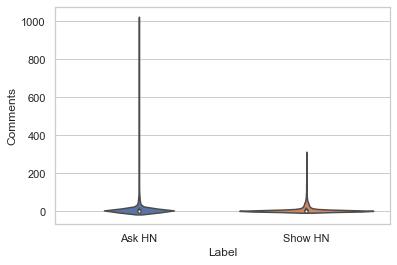

In [10]:
sb.set(style = 'whitegrid')
sb.violinplot(x = "Label",
             y = "Comments",
             data = ask_show_df)

The violin plot is usually nice, but here there are many extreme values and we cannot tell how many points cover the range from the large bulk to the extremes. Thus, we'll also make a boxplot.

<AxesSubplot:title={'center':'Comments'}, xlabel='Label'>

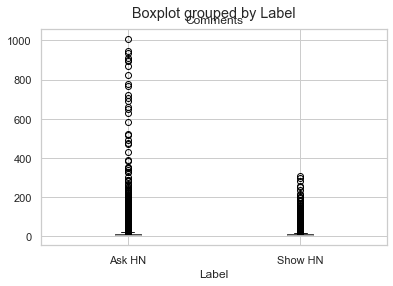

In [11]:
ask_show_df.boxplot(by ='Label', column ='Comments')

It looks like there are quite a few extreme values in both data sets, where the extremes are much larger in "Ask HN" posts. We'll have another look at the numbers, this time with a histogram for each kind of post to gather the numbers into larger bins and compress the graph.

array([<AxesSubplot:title={'center':'Ask HN'}>,
       <AxesSubplot:title={'center':'Show HN'}>], dtype=object)

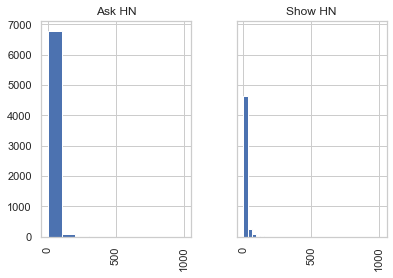

In [12]:
ask_show_df.hist(by ='Label', column ='Comments', sharey = True, sharex = True)

The histogram shows, as the violin plot and boxplot do, that the majority of posts in both data sets get very few comments, but there are a larger amount of "Ask HN" posts with a very high numbers of comments. Interestingly, the boxplot shows that it's not just one or two outliers with high values but a range of posts with 400 to 1000 comments, whereas "Show HN" posts have a maximum number of comments just over 300.

These results suggest that making an "Ask HN" post would be more likely to get an extreme number of comments, though the overall likelihood of this is quite low. We will now compare the average number of comments per posts, which we can see will be affected by the extreme values in the number of comments for "Ask HN" posts.

In [13]:
avg_ask_comments = total_ask_comments / len(ask_posts)
avg_show_comments = total_show_comments / len(show_posts)

print(round(avg_ask_comments, 2))
print(round(avg_show_comments, 2))

13.74
9.81


In [14]:
import statistics as stats

sd_ask_comments = stats.stdev(all_ask_comments)
sd_show_comments = stats.stdev(all_show_comments)

print(round(sd_ask_comments, 2))
print(round(sd_show_comments, 2))

49.57
21.81


The average number of comments per post, as we determined above differs, with "Ask HN" posts showing more comments on average (13.74) than "Show HN" posts (9.81). However, the number of comments also varies most strongly among "Ask HN" (SD = 49.57), per the extreme values cited above. This is in contrast to the smaller variation in "Show HN" comments (SD = 21.81). We want to do some stats on these averages to see if the differences are really meaningful. Let's run a simple independent t-test on "Ask HN" and "Show HN" posts.

In [15]:
import scipy.stats

ask_show_t = scipy.stats.ttest_ind(all_ask_comments, all_show_comments, equal_var = False) 

print("Ask HN vs. Show HN: \n" + \
        "t = " + str(round(ask_show_t[0], 2)) + \
         " p = " + str(round(ask_show_t[1]/3, 4)))

Ask HN vs. Show HN: 
t = 5.87 p = 0.0


The statistics reinforce our conclusion from above: the average number of comments per post is higher for "Ask HN" posts (15.35) than "Show HN" posts. This result suggests that posting "Ask HN" would be likely to receive more responses. 

However, since any one post is unlikely to receive an extreme amount of comments (350-1000), it might be nice if we restricted the "Ask HN" data set to include the same maximum as the "Show HN" set and see whether it would still net more comments to post "Ask HN". Thus, we'll cut the "Ask HN" and check the results.

### Ask HN vs. Show HN with the Same Comment Number Range

First, let's find the max number of "Show HN" comments and restrict the "Ask HN" data set by that.

In [16]:
total_ask_comments, all_ask_comments = count_comments(ask_posts)
total_show_comments, all_show_comments = count_comments(show_posts)

max_show = max(all_show_comments)
print("Maximum # of 'Show HN' Comments:" + str(max_show))

all_ask_restricted = []
total_ask_restricted = []

for num in all_ask_comments:
    if num <= max_show:
        all_ask_restricted.append(num)
        
print("# of rows in restricted 'Ask HN' data set: " + str(len(all_ask_restricted)))

Maximum # of 'Show HN' Comments:306
# of rows in restricted 'Ask HN' data set: 6880


 As seen above, not too many posts had extreme values--only about 30.
 
 Now, let's take the average again and plot the data in the same ways.

In [17]:
sum_ask_restricted = sum(all_ask_restricted)
avg_ask_restricted = sum_ask_restricted / len(all_ask_restricted)

print("Ask HN: ", str(round(avg_ask_restricted, 2)))
print("Show HN: ", str(round(avg_show_comments, 2)))

Ask HN:  11.02
Show HN:  9.81


It looks like the difference in the average number of comments is maintained. Let's plot them.

In [18]:
ask_label_restr = ["Ask HN"] * len(all_ask_restricted)
ask_show_label_restr = ask_label_restr + show_label
ask_show_data_restr = all_ask_restricted + all_show_comments

ask_show_restr_df = pd.DataFrame(list(zip(ask_show_label_restr, ask_show_data_restr)), columns =['Label', 'Comments'])
print(ask_show_restr_df.head())

    Label  Comments
0  Ask HN         7
1  Ask HN         3
2  Ask HN         3
3  Ask HN         2
4  Ask HN         1


<AxesSubplot:xlabel='Label', ylabel='Comments'>

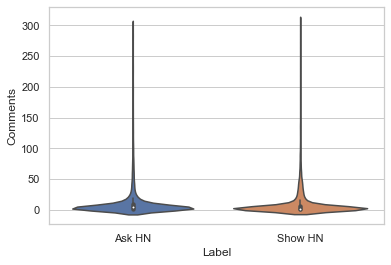

In [19]:
sb.set(style = 'whitegrid')
sb.violinplot(x = "Label",
             y = "Comments",
             data = ask_show_restr_df)

The violin plots look much more similar without the very extreme values.

<AxesSubplot:title={'center':'Comments'}, xlabel='Label'>

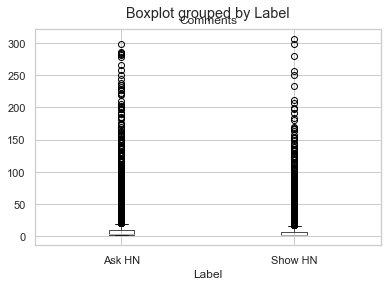

In [20]:
ask_show_restr_df.boxplot(by ='Label', column ='Comments')

array([<AxesSubplot:title={'center':'Ask HN'}>,
       <AxesSubplot:title={'center':'Show HN'}>], dtype=object)

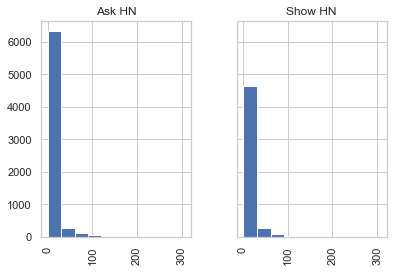

In [21]:
ask_show_restr_df.hist(by ='Label', column ='Comments', sharey = True, sharex = True)

The boxplot and histogram show that there are still a larger number of extreme comments in "Ask HN" posts, even with the restricted range. If we look closesly at the boxplot, the third quartile reaches higher for "Ask HN" posts as well. Let's do our final statistics to make sure.

In [22]:
ask_show_t = scipy.stats.ttest_ind(all_ask_restricted, all_show_comments, equal_var = False) 

print("Ask HN vs. Show HN: \n" + \
        "t = " + str(round(ask_show_t[0], 2)) + \
         " p = " + str(round(ask_show_t[1]/3, 4)))

Ask HN vs. Show HN: 
t = 2.84 p = 0.0015


The difference in the average number of comments for "Ask HN" and "Show HN" posts is still statistically significant, even when they are restricted to the same range of number of comments. This finalizes the fact that we should make an "Ask HN" post to maximize the response.

### Does Time of Day Influence Number of Comments?

Now that we know that we want to make an "Ask HN" post, we should figure out *when* we should make the post. To do this, we'll get the average number of comments in the "Ask HN" data set per hour of day. 

First, we'll create a simplified data set with only what we want, and then we'll make frequency tables of the comments by hour and counts by hour to make an average.

Simplified data set:

In [23]:
import datetime as dt

result_list = []

for row in ask_posts:
    n_comm = int(row[4])
    created_at = row[-1]
    result_list.append([created_at, n_comm])
    
print(result_list[:5])

[['9/26/2016 2:53', 7], ['9/26/2016 1:17', 3], ['9/25/2016 22:48', 3], ['9/25/2016 21:50', 2], ['9/25/2016 19:30', 1]]


Frequency tables:

In [24]:
counts_by_hour = {}
comments_by_hour = {}

for row in result_list:
    n_comm = int(row[1])
    created_at = row[0]
    created_at = dt.datetime.strptime(created_at, "%m/%d/%Y %H:%M")
    #print(created_at)
    #created_hour = created_at.hour
    created_hour = created_at.strftime("%H")
    #print(created_hour)
    if created_hour in counts_by_hour:
        counts_by_hour[created_hour] += 1
        comments_by_hour[created_hour] += n_comm
    else:
        counts_by_hour[created_hour] = 1
        comments_by_hour[created_hour] = n_comm
        
print(counts_by_hour)
print(comments_by_hour)
    

{'02': 227, '01': 223, '22': 287, '21': 407, '19': 420, '17': 404, '15': 467, '14': 378, '13': 326, '11': 251, '10': 219, '09': 176, '07': 157, '03': 212, '16': 415, '08': 190, '00': 231, '23': 276, '20': 392, '18': 452, '12': 274, '04': 186, '06': 176, '05': 165}
{'02': 2996, '01': 2089, '22': 3372, '21': 4500, '19': 3954, '17': 5547, '15': 18525, '14': 4972, '13': 7245, '11': 2797, '10': 3013, '09': 1477, '07': 1585, '03': 2154, '16': 4466, '08': 2362, '00': 2277, '23': 2297, '20': 4462, '18': 4877, '12': 4234, '04': 2360, '06': 1587, '05': 1838}


Taking the averages by hour:

In [25]:
comm_by_hour_avg = []

for hour in counts_by_hour:
    avg = comments_by_hour[hour] / counts_by_hour[hour]
    avg = round(avg, 3)
    comm_by_hour_avg.append([hour, avg])
    
comm_by_hour_avg = sorted(comm_by_hour_avg)

for row in comm_by_hour_avg:
    print(row[0] + ": " + str(row[1]))

00: 9.857
01: 9.368
02: 13.198
03: 10.16
04: 12.688
05: 11.139
06: 9.017
07: 10.096
08: 12.432
09: 8.392
10: 13.758
11: 11.143
12: 15.453
13: 22.224
14: 13.153
15: 39.668
16: 10.761
17: 13.73
18: 10.79
19: 9.414
20: 11.383
21: 11.057
22: 11.749
23: 8.322


Now that we have the data we want, it's just a matter of making it readable. Let's create a data set that we can sort by average number of comments with `sorted()`, then we'll get the top 5 hours in which we could create our "Ask HN" post.

In [26]:
swap_comm_by_hour_avg = []

for row in comm_by_hour_avg:
    swap_comm_by_hour_avg.append([row[1], row[0]])

swap_comm_by_hour_avg = sorted(swap_comm_by_hour_avg, reverse = True)

print("Top 5 Hours for Ask Posts Comments")
for row in swap_comm_by_hour_avg[:5]:
    time = dt.datetime.strptime(row[1], "%H")
    time = time.strftime("%H:%M")
    ncomm = row[0]
    template = "{time} : {ncomm:.2f}"
    print(template.format(time = time, ncomm=ncomm))
    #print(time + ": " + str(ncomm))

Top 5 Hours for Ask Posts Comments
15:00 : 39.67
13:00 : 22.22
12:00 : 15.45
10:00 : 13.76
17:00 : 13.73


If writing an "Ask HN" post, it is clear that the best time to post is during the hour of 15:00-15:59 (3:00-3:59 pm) Eastern Time. The average number of comments per post (39.67) is far higher during this hour than any other hour of the day. This hour has nearly double the average number of comments as the next highest hour (12:00: 21.9 comments). 

## Conclusions

If our goal is to reach the Hacker News community with a post, we should post an "Ask HN" or a "Show HN" post--but we wanted to know which would be the better kind to net a large response. From the data set used here, it is clear that an "Ask HN" post will net more comments than a "Show HN" post. This was true whether we looked at the whole data sets or restrict the data sets to have less extreme values. Notably, "Ask HN" posts are the only ones with more than 309 comments, making it more likely--even if still quite unlikely--that our "Ask HN" post will get an extreme amount of comments. Furthermore, if we make our post between 3:00 and 4:00 pm Eastern Time, we are likely to receive nearly twice the amount of comments as during any other hour of the day. 

The only caveat to this conclusion is that we have excluded data points with zero comments. It could be true not only that "Ask HN" posts receive more comments, but also that they are more likely to receive no comments than "Show HN" posts. We have not looked into this question in the current analysis, but further anlayses could determine whether this is a problem we need to worry about.